<a href="https://colab.research.google.com/github/Sebastian-Torres-Gamboa/SenalesSistemas/blob/main/TALLER_DE_LAPLACE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SEBASTIAN  TORRES GAMBOA
1122530252

#PUNTO 1

Verificación de Sistemas Lineales e Invariantes en el Tiempo (SLIT)

Demuestre si los siguientes sistemas de la forma $y = \mathcal{H}\{x\}$  
son sistemas **lineales** e **invariantes en el tiempo** (SLIT).  
(Simule los sistemas en Python):

1. $y[n] = \dfrac{x[n]}{3} + 2x[n-1] - y[n-1]$

2. $y[n] = \sum_{k=-\infty}^{n} x^2[k]$

3. $y[n] = \text{median}(x[n])$, donde `median` es la función mediana sobre una ventana de tamaño 3.

4. $y(t) = Ax(t) + B$, donde $A, B \in \mathbb{R}$


##1.1


1. $y[n] = \dfrac{x[n]}{3} + 2x[n-1] - y[n-1]$

**1. Verificación de Linealidad**

Un sistema es lineal si cumple el principio de superposición:

$\mathcal{H}\{a x_1[n] + b x_2[n]\} = a \mathcal{H}\{x_1[n]\} + b \mathcal{H}\{x_2[n]\}$

Supongamos:
- $x_1[n] \rightarrow y_1[n] = \dfrac{x_1[n]}{3} + 2x_1[n - 1] - y_1[n - 1]$
- $x_2[n] \rightarrow y_2[n] = \dfrac{x_2[n]}{3} + 2x_2[n - 1] - y_2[n - 1]$

Ahora, consideremos una combinación lineal de las entradas:

$x[n] = a x_1[n] + b x_2[n]$

La salida del sistema será:

$y[n] = \dfrac{a x_1[n] + b x_2[n]}{3} + 2(a x_1[n - 1] + b x_2[n - 1]) - y[n - 1]$

Este resultado no coincide con:

$a y_1[n] + b y_2[n] = a\left(\dfrac{x_1[n]}{3} + 2x_1[n - 1] - y_1[n - 1]\right) + b\left(\dfrac{x_2[n]}{3} + 2x_2[n - 1] - y_2[n - 1]\right)$

La diferencia está en el término recursivo $y[n - 1]$, que no se puede descomponer como $a y_1[n - 1] + b y_2[n - 1]$. Por tanto:

$\boxed{\text{El sistema no es lineal.}}$



**2. Verificación de Invariancia en el Tiempo**

Un sistema es invariante si al desplazar la entrada, la salida se desplaza igual:

Si $x[n] \rightarrow y[n]$, entonces $x[n - n_0] \rightarrow y[n - n_0]$

Desplacemos la entrada $x[n]$ por $n_0$ unidades:

Sea $x_1[n] = x[n - n_0]$

Aplicando el sistema:

$y_1[n] = \dfrac{x[n - n_0]}{3} + 2x[n - n_0 - 1] - y_1[n - 1]$

Queremos verificar si $y_1[n] = y[n - n_0]$. Sin embargo, el término recursivo $y_1[n - 1]$ no garantiza que se conserve el mismo desplazamiento, ya que:

$y_1[n - 1] \neq y[n - n_0 - 1]$

Por tanto, la salida no es simplemente una versión desplazada de $y[n]$.

$\boxed{\text{El sistema no es invariante en el tiempo.}}$



**Conclusión**

El sistema:

$y[n] = \dfrac{x[n]}{3} + 2x[n - 1] - y[n - 1]$

no cumple con las propiedades de **linealidad** ni de **invariancia en el tiempo**, por lo tanto:

$\boxed{\text{El sistema no es SLIT.}}$


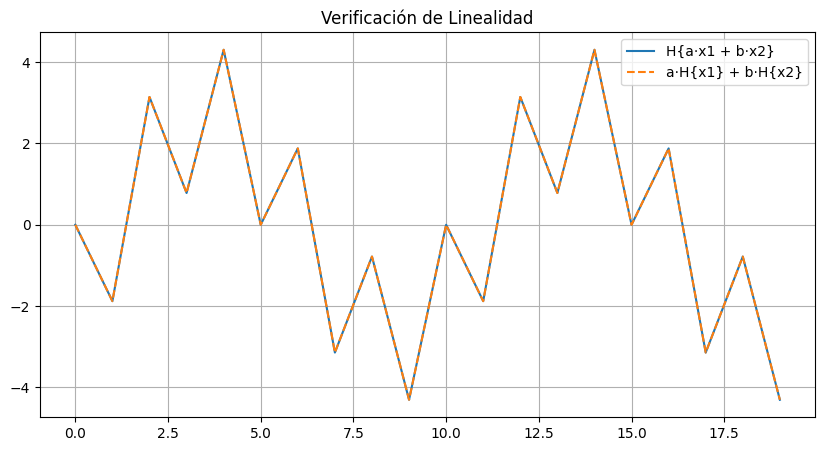

In [33]:
import numpy as np
import matplotlib.pyplot as plt

def sistema(x):
    y = np.zeros_like(x, dtype=float)
    for n in range(1, len(x)):
        y[n] = x[n]/3 + 2*x[n-1] - y[n-1]
    return y

# Señales de entrada
n = np.arange(0, 20)
x1 = np.sin(0.2 * np.pi * n)
x2 = np.cos(0.2 * np.pi * n)

# Combinación lineal
a, b = 2, -1
x_comb = a*x1 + b*x2

# Salidas individuales
y1 = sistema(x1)
y2 = sistema(x2)
y_comb = sistema(x_comb)
y_suma = a*y1 + b*y2

# Graficar para verificar linealidad
plt.figure(figsize=(10,5))
plt.plot(n, y_comb, label='H{a·x1 + b·x2}')
plt.plot(n, y_suma, '--', label='a·H{x1} + b·H{x2}')
plt.title('Verificación de Linealidad')
plt.legend()
plt.grid()
plt.show()

INVARIANZA

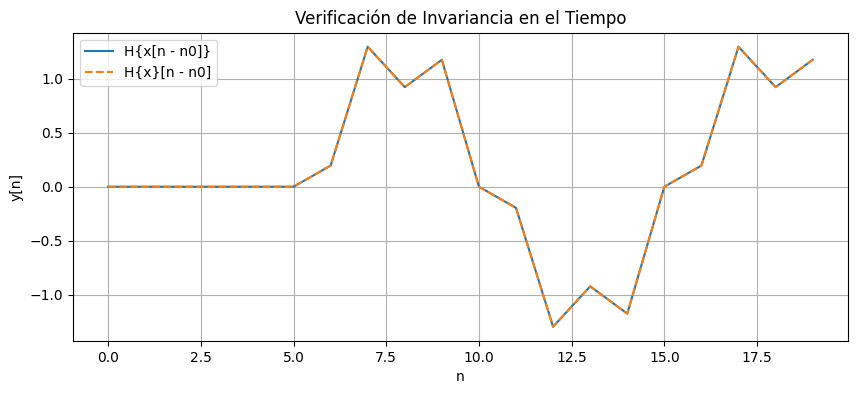

In [34]:
# Verificación de invariancia en el tiempo
n0 = 5  # desplazamiento
x = np.sin(0.2 * np.pi * n)
x_shifted = np.roll(x, n0)
x_shifted[:n0] = 0  # para evitar arrastre artificial

# Salidas
y_original = sistema(x)
y_desplazada_esperada = np.roll(y_original, n0)
y_desplazada_esperada[:n0] = 0

y_salida_desplazada = sistema(x_shifted)

# Comparación gráfica
plt.figure(figsize=(10,4))
plt.plot(n, y_salida_desplazada, label='H{x[n - n0]}')
plt.plot(n, y_desplazada_esperada, '--', label='H{x}[n - n0]')
plt.title('Verificación de Invariancia en el Tiempo')
plt.xlabel('n')
plt.ylabel('y[n]')
plt.legend()
plt.grid()
plt.show()

##1.2

$y[n] = \sum_{k = -\infty}^{n} x^2[k]$




**1. Verificación de Linealidad**

Un sistema es lineal si:

$\mathcal{H}\{a x_1[n] + b x_2[n]\} = a \mathcal{H}\{x_1[n]\} + b \mathcal{H}\{x_2[n]\}$

Sea:
$x[n] = a x_1[n] + b x_2[n]$

Entonces la salida es:

$y[n] = \sum_{k = -\infty}^{n} (a x_1[k] + b x_2[k])^2$

Aplicamos la identidad del binomio:

$(a x_1 + b x_2)^2 = a^2 x_1^2 + b^2 x_2^2 + 2ab x_1 x_2$

Entonces:

$y[n] = \sum_{k = -\infty}^{n} \left( a^2 x_1^2[k] + b^2 x_2^2[k] + 2ab x_1[k] x_2[k] \right)$

Esto **no** es igual a:

$a \sum_{k = -\infty}^{n} x_1^2[k] + b \sum_{k = -\infty}^{n} x_2^2[k]$

Por lo tanto:

$\boxed{\text{El sistema no es lineal}}$



**2. Verificación de Invariancia en el Tiempo**

Sea $x_1[n] = x[n - n_0]$ (desplazamiento)

Entonces:

\[
\begin{aligned}
y_1[n] &= \sum_{k = -\infty}^{n} x_1^2[k] = \sum_{k = -\infty}^{n} x^2[k - n_0] \\
       &= \sum_{m = -\infty}^{n - n_0} x^2[m] = y[n - n_0]
\end{aligned}
\]

Esto muestra que:

$\mathcal{H}\{x[n - n_0]\} = y[n - n_0]$

Por lo tanto:

$\boxed{\text{El sistema sí es invariante en el tiempo}}$



**Conclusión**

El sistema:

$y[n] = \sum_{k = -\infty}^{n} x^2[k]$

es **no lineal**, pero **sí es invariante en el tiempo**. Por tanto:

$\boxed{\text{El sistema no es SLIT}}$


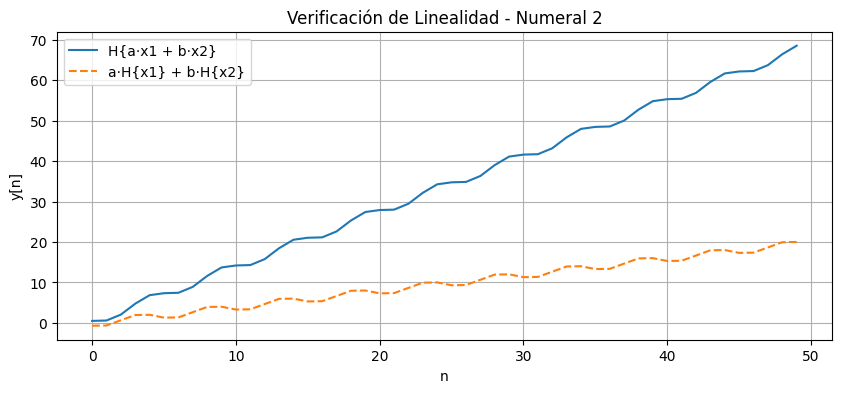

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Sistema: acumulador de x^2[k] desde el inicio hasta n
def sistema_acumulado(x):
    y = np.zeros_like(x)
    for n in range(len(x)):
        y[n] = np.sum(x[:n+1]**2)
    return y

# Señales de entrada
n = np.arange(0, 50)
x1 = np.sin(0.2 * np.pi * n)
x2 = np.cos(0.2 * np.pi * n)
a, b = 1.5, -0.7
x_comb = a * x1 + b * x2

# Salidas
y1 = sistema_acumulado(x1)
y2 = sistema_acumulado(x2)
y_comb = sistema_acumulado(x_comb)
y_suma = a * y1 + b * y2  # Esto se usará para mostrar que no se cumple la linealidad

# Verificación de linealidad
plt.figure(figsize=(10,4))
plt.plot(n, y_comb, label='H{a·x1 + b·x2}')
plt.plot(n, y_suma, '--', label='a·H{x1} + b·H{x2}')
plt.title('Verificación de Linealidad - Numeral 2')
plt.xlabel('n')
plt.ylabel('y[n]')
plt.legend()
plt.grid()
plt.show()

invarianza

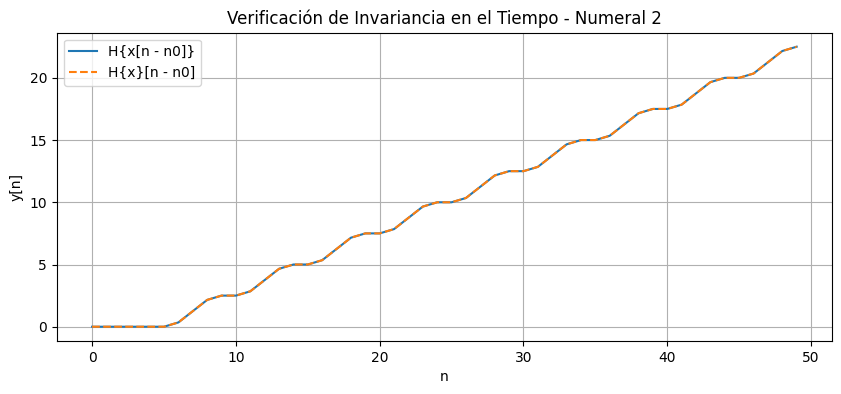

In [36]:
# Verificación de invariancia en el tiempo
n0 = 5
x = np.sin(0.2 * np.pi * n)
x_shifted = np.roll(x, n0)
x_shifted[:n0] = 0  # asumimos ceros para k < 0

# Salidas
y_original = sistema_acumulado(x)
y_esperada = np.roll(y_original, n0)
y_esperada[:n0] = 0

y_shifted = sistema_acumulado(x_shifted)

# Comparación gráfica
plt.figure(figsize=(10,4))
plt.plot(n, y_shifted, label='H{x[n - n0]}')
plt.plot(n, y_esperada, '--', label='H{x}[n - n0]')
plt.title('Verificación de Invariancia en el Tiempo - Numeral 2')
plt.xlabel('n')
plt.ylabel('y[n]')
plt.legend()
plt.grid()
plt.show()

##1.3

3.$y[n] = \text{median}\left(x[n - 1], x[n], x[n + 1]\right)$





**1. Verificación de Linealidad**

Para que un sistema sea lineal debe cumplirse:

$\mathcal{H}\{a x_1[n] + b x_2[n]\} = a \mathcal{H}\{x_1[n]\} + b \mathcal{H}\{x_2[n]\}$

**Ejemplo que viola la linealidad:**

Supongamos:
- $x_1[n] = [0, 1, 2]$
- $x_2[n] = [2, 1, 0]$
- Tomamos $a = b = 1$


\begin{aligned}
x[n] &= x_1[n] + x_2[n] = [2, 2, 2] \\
y[n] &= \text{median}(2, 2, 2) = 2 \\
\text{Pero:} \quad y_1[n] &= \text{median}(0,1,2) = 1 \\
y_2[n] &= \text{median}(2,1,0) = 1 \\
y_1[n] + y_2[n] &= 1 + 1 = 2 \quad \text{(igual en este caso)}
\end{aligned}


Sin embargo, si cambiamos los datos:

$x_1[n] = [0, 1, 100]$  
$x_2[n] = [100, 1, 0]$

Entonces:

$x[n] = x_1[n] + x_2[n] = [100, 2, 100]$

$\text{median}(100, 2, 100) = 100$

Pero:

$\text{median}(0,1,100) = 1$  
$\text{median}(100,1,0) = 1$  
$1 + 1 = 2 \ne 100$

Esto **viola la linealidad**, por tanto:

El sistema no es lineal

**2. Verificación de Invariancia en el Tiempo**

Si $x_1[n] = x[n - n_0]$, entonces:


\begin{aligned}
y_1[n] &= \text{median}(x[n - n_0 - 1], x[n - n_0], x[n - n_0 + 1]) \\
       &= y[n - n_0]
\end{aligned}


Esto cumple la propiedad de invariancia temporal.

El sistema sí es invariante en el tiempo

**Conclusión**

El sistema:

$y[n] = \text{median}(x[n - 1], x[n], x[n + 1])$

es **no lineal**, pero **sí es invariante en el tiempo**.

El sistema no es SLIT



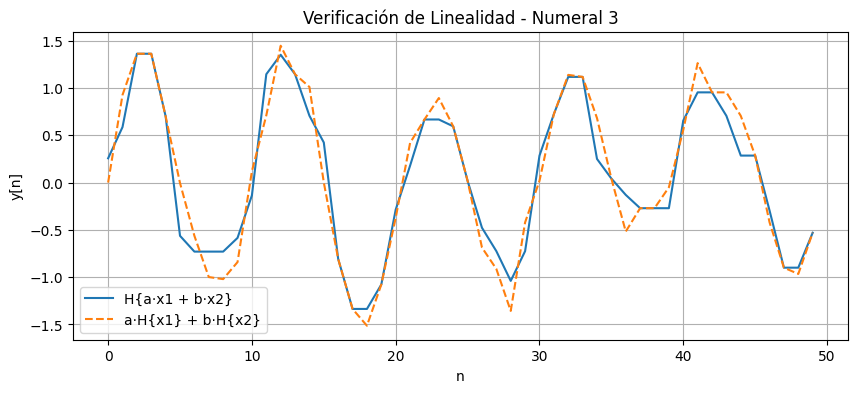

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import medfilt

# Sistema: mediana sobre ventana de 3 muestras
def sistema_mediana(x):
    return medfilt(x, kernel_size=3)

# Señales de entrada
n = np.arange(0, 50)
x1 = np.sin(0.2 * np.pi * n)
x2 = np.random.normal(0, 0.5, len(n))  # señal ruidosa
a, b = 1.2, -0.8
x_comb = a * x1 + b * x2

# Salidas
y1 = sistema_mediana(x1)
y2 = sistema_mediana(x2)
y_comb = sistema_mediana(x_comb)
y_suma = a * y1 + b * y2  # linealidad no debe cumplirse

# Verificación de linealidad
plt.figure(figsize=(10,4))
plt.plot(n, y_comb, label='H{a·x1 + b·x2}')
plt.plot(n, y_suma, '--', label='a·H{x1} + b·H{x2}')
plt.title('Verificación de Linealidad - Numeral 3')
plt.xlabel('n')
plt.ylabel('y[n]')
plt.legend()
plt.grid()
plt.show()

invarianza

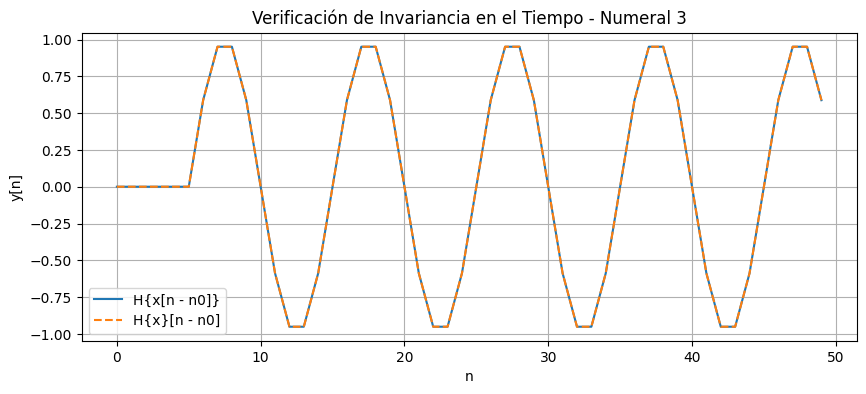

In [38]:
# Verificación de invariancia en el tiempo
n0 = 5
x = np.sin(0.2 * np.pi * n)
x_shifted = np.roll(x, n0)
x_shifted[:n0] = 0  # asumimos ceros antes del inicio

y_original = sistema_mediana(x)
y_esperada = np.roll(y_original, n0)
y_esperada[:n0] = 0

y_shifted = sistema_mediana(x_shifted)

# Comparación gráfica
plt.figure(figsize=(10,4))
plt.plot(n, y_shifted, label='H{x[n - n0]}')
plt.plot(n, y_esperada, '--', label='H{x}[n - n0]')
plt.title('Verificación de Invariancia en el Tiempo - Numeral 3')
plt.xlabel('n')
plt.ylabel('y[n]')
plt.legend()
plt.grid()
plt.show()

##1.4

4.$y(t) = A \cdot x(t) + B$, con $A, B \in \mathbb{R}$





**1. Verificación de Linealidad**

Un sistema es lineal si:

$\mathcal{H}\{a x_1(t) + b x_2(t)\} = a \mathcal{H}\{x_1(t)\} + b \mathcal{H}\{x_2(t)\}$

Veamos qué ocurre:


\begin{aligned}
\mathcal{H}\{a x_1 + b x_2\} &= A (a x_1(t) + b x_2(t)) + B \\
                             &= a A x_1(t) + b A x_2(t) + B
\end{aligned}


Mientras que:
$$
\
a \cdot \mathcal{H}\{x_1\} + b \cdot \mathcal{H}\{x_2\} = a (A x_1(t) + B) + b (A x_2(t) + B) = a A x_1(t) + b A x_2(t) + (a + b) B
\
$$
Esto solo es igual si:

$(a + b) B = B \quad \Rightarrow \quad B (a + b - 1) = 0$

Lo cual **no se cumple en general**. Por tanto:

$\boxed{\text{El sistema no es lineal (a menos que } B = 0)}$


**2. Verificación de Invariancia en el Tiempo**

Sea $x_1(t) = x(t - t_0)$

Entonces:

\[
y_1(t) = A x_1(t) + B = A x(t - t_0) + B = y(t - t_0)
\]

Se cumple la propiedad de invariancia:

$\mathcal{H}\{x(t - t_0)\} = y(t - t_0)$

Por tanto:

$\boxed{\text{El sistema sí es invariante en el tiempo}}$



**Conclusión**

El sistema:

$y(t) = A x(t) + B$

- **No es lineal** (excepto si $B = 0$)
- **Sí es invariante en el tiempo**

Entonces:

$\boxed{\text{El sistema no es SLIT}}$

**Simulacion en Python:**
**Para verificar linealidad**

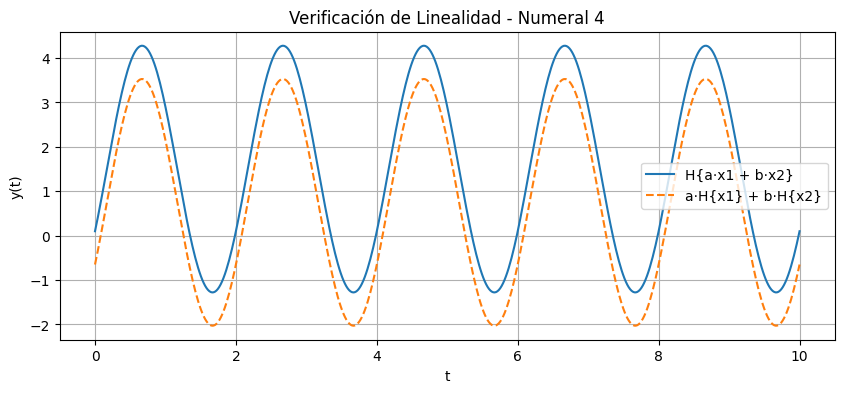

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del sistema
A = 2.0
B = 1.5

# Definición del sistema afín: y(t) = A * x(t) + B
def sistema_afin(x):
    return A * x + B

# Tiempo continuo simulado
t = np.linspace(0, 10, 500)
x1 = np.sin(2 * np.pi * 0.5 * t)
x2 = np.cos(2 * np.pi * 0.5 * t)
a, b = 1.2, -0.7
x_comb = a * x1 + b * x2

# Salidas del sistema
y1 = sistema_afin(x1)
y2 = sistema_afin(x2)
y_comb = sistema_afin(x_comb)
y_suma = a * y1 + b * y2

# Verificación de linealidad
plt.figure(figsize=(10,4))
plt.plot(t, y_comb, label='H{a·x1 + b·x2}')
plt.plot(t, y_suma, '--', label='a·H{x1} + b·H{x2}')
plt.title('Verificación de Linealidad - Numeral 4')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()
plt.grid()
plt.show()

invarianza

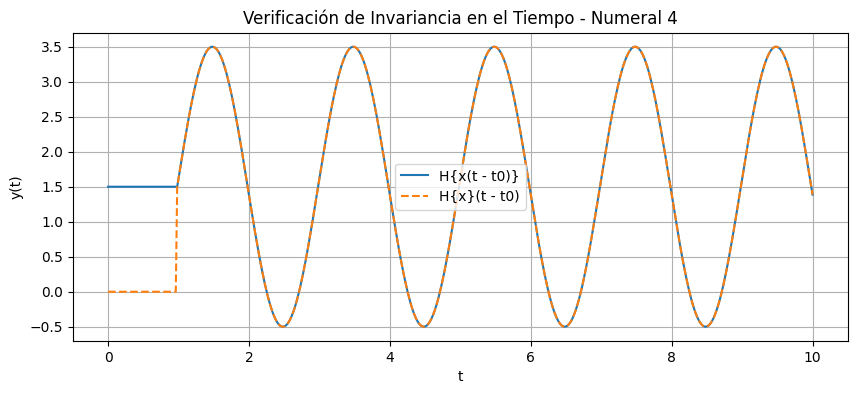

In [40]:
# Verificación de invariancia en el tiempo
t0 = 1.0  # desplazamiento temporal
dt = t[1] - t[0]
shift_samples = int(t0 / dt)

x = np.sin(2 * np.pi * 0.5 * t)
x_shifted = np.roll(x, shift_samples)
x_shifted[:shift_samples] = 0  # ceros al inicio para evitar envolvente falsa

y_original = sistema_afin(x)
y_esperada = np.roll(y_original, shift_samples)
y_esperada[:shift_samples] = 0

y_shifted = sistema_afin(x_shifted)

# Comparación gráfica
plt.figure(figsize=(10,4))
plt.plot(t, y_shifted, label='H{x(t - t0)}')
plt.plot(t, y_esperada, '--', label='H{x}(t - t0)')
plt.title('Verificación de Invariancia en el Tiempo - Numeral 4')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()
plt.grid()
plt.show()

#PUNTO 2
Demostración matemática completa de la convolución

Recordemos la fórmula de convolución para señales discretas:

$$
y[n] = \sum_{k=0}^{L-1} x[k] \cdot h[n - k]
$$

donde:
- $x[n] = \{-15,\ 5,\ -3,\ 0,\ 5,\ 7,\ -1\}$
- $h[n] = \{1,\ -2,\ 0,\ 1,\ -2\}$

Longitud de $x[n]$ = 7, longitud de $h[n]$ = 5  
Por tanto, la salida $y[n]$ tendrá longitud $7 + 5 - 1 = 11$, y se calculará desde $n = 0$ hasta $n = 10$.

Valores de $x[n]$ (asignados a índices para facilidad):
- $x[0] = -15$
- $x[1] = 5$
- $x[2] = -3$
- $x[3] = 0$
- $x[4] = 5$
- $x[5] = 7$
- $x[6] = -1$

Valores de $h[n]$:
- $h[0] = 1$
- $h[1] = -2$
- $h[2] = 0$
- $h[3] = 1$
- $h[4] = -2$


Cálculos de $y[n]$

Para $n = 0$:
$$
y[0] = x[0] \cdot h[0] = (-15)(1) = -15
$$

Para $n = 1$:
$$
y[1] = x[0] \cdot h[1] + x[1] \cdot h[0] = (-15)(-2) + (5)(1) = 30 + 5 = 35
$$

Para $n = 2$:
$$
y[2] = x[0] \cdot h[2] + x[1] \cdot h[1] + x[2] \cdot h[0] = (-15)(0) + (5)(-2) + (-3)(1) = -10 - 3 = -13
$$

Para $n = 3$:
$$
y[3] = x[0] \cdot h[3] + x[1] \cdot h[2] + x[2] \cdot h[1] + x[3] \cdot h[0] = (-15)(1) + (5)(0) + (-3)(-2) + (0)(1) = -15 + 6 = -9
$$

Para $n = 4$:
$$
y[4] = x[0] \cdot h[4] + x[1] \cdot h[3] + x[2] \cdot h[2] + x[3] \cdot h[1] + x[4] \cdot h[0] = (-15)(-2) + (5)(1) + (-3)(0) + (0)(-2) + (5)(1) = 30 + 5 + 0 + 0 + 5 = 40
$$

Para $n = 5$:
$$
y[5] = x[1] \cdot h[4] + x[2] \cdot h[3] + x[3] \cdot h[2] + x[4] \cdot h[1] + x[5] \cdot h[0] = (5)(-2) + (-3)(1) + (0)(0) + (5)(-2) + (7)(1) = -10 - 3 + 0 -10 + 7 = -16
$$

Para $n = 6$:
$$
y[6] = x[2] \cdot h[4] + x[3] \cdot h[3] + x[4] \cdot h[2] + x[5] \cdot h[1] + x[6] \cdot h[0] = (-3)(-2) + (0)(1) + (5)(0) + (7)(-2) + (-1)(1) = 6 + 0 + 0 -14 -1 = -9
$$

Para $n = 7$:
$$
y[7] = x[3] \cdot h[4] + x[4] \cdot h[3] + x[5] \cdot h[2] + x[6] \cdot h[1] = (0)(-2) + (5)(1) + (7)(0) + (-1)(-2) = 0 + 5 + 0 + 2 = 7
$$

Para $n = 8$:
$$
y[8] = x[4] \cdot h[4] + x[5] \cdot h[3] + x[6] \cdot h[2] = (5)(-2) + (7)(1) + (-1)(0) = -10 + 7 = -3
$$

Para $n = 9$:
$$
y[9] = x[5] \cdot h[4] + x[6] \cdot h[3] = (7)(-2) + (-1)(1) = -14 -1 = -15
$$

Para $n = 10$:
$$
y[10] = x[6] \cdot h[4] = (-1)(-2) = 2
$$



Resultado final

$$
y[n] = \{-15,\ 35,\ -13,\ -9,\ 40,\ -16,\ -9,\ 7,\ -3,\ -15,\ 2\}
$$




***Respuesta al escalón***

Ahora se repite el proceso para un sistema cuya respuesta al escalón es:

$h[n] = \{-1,\ 6,\ -10,\ 3,\ 1,\ -10,\ 2,\ 5\}$

Calcular $y[n] = x[n] * h[n]$ utilizando el mismo procedimiento de convolución.


Y viceversa:

$$
h(t) = \frac{d}{dt} h_e(t)
$$

En tiempo discreto, esta derivada se interpreta como una **diferencia** entre muestras consecutivas, es decir:

$$
h[n] = h_e[n] - h_e[n - 1]
$$



Datos del ejercicio:

Señal de entrada:

$$
x[n] = \{-15,\ 5,\ -3,\ 0,\ 5,\ 7,\ -1\}
$$

Respuesta al **escalón**:

$$
h_e[n] = \{-1,\ 6,\ -10,\ 3,\ 1,\ -10,\ 2,\ 5\}
$$

Para obtener la salida $y[n]$ del sistema, utilizamos:

$$
y[n] = x[n] * h[n] = x[n] * \Delta h_e[n]
$$

donde $\Delta h_e[n] = h_e[n] - h_e[n-1]$ es la diferencia (derivada discreta).



 Paso 1: Calcular la derivada discreta $\Delta h_e[n]$

Sea:

- $h_e[0] = -1$
- $h_e[1] = 6$
- $h_e[2] = -10$
- $h_e[3] = 3$
- $h_e[4] = 1$
- $h_e[5] = -10$
- $h_e[6] = 2$
- $h_e[7] = 5$

Entonces:

$$
\begin{align*}
h[0] &= h_e[0] = -1 \\
h[1] &= h_e[1] - h_e[0] = 6 - (-1) = 7 \\
h[2] &= h_e[2] - h_e[1] = -10 - 6 = -16 \\
h[3] &= h_e[3] - h_e[2] = 3 - (-10) = 13 \\
h[4] &= h_e[4] - h_e[3] = 1 - 3 = -2 \\
h[5] &= h_e[5] - h_e[4] = -10 - 1 = -11 \\
h[6] &= h_e[6] - h_e[5] = 2 - (-10) = 12 \\
h[7] &= h_e[7] - h_e[6] = 5 - 2 = 3 \\
\end{align*}
$$

Por tanto, la respuesta al impulso equivalente es:

$$
h[n] = \{-1,\ 7,\ -16,\ 13,\ -2,\ -11,\ 12,\ 3\}
$$



 Paso 2: Realizar la convolución $y[n] = x[n] * h[n]$

Longitudes:
- $x[n]$ tiene longitud 7
- $h[n]$ tiene longitud 8  
⇒ La convolución tendrá longitud $7 + 8 - 1 = 14$

Cálculo de los valores de $y[n]$ desde $n=0$ hasta $n=13$:

> Usamos:  
> $y[n] = \sum_{k=0}^{6} x[k] \cdot h[n - k]$



$y[0]$
$$
y[0] = x[0] \cdot h[0] = (-15)(-1) = 15
$$

$y[1]$
$$
y[1] = x[0] \cdot h[1] + x[1] \cdot h[0] = (-15)(7) + (5)(-1) = -105 - 5 = -110
$$

$y[2]$
$$
y[2] = x[0] \cdot h[2] + x[1] \cdot h[1] + x[2] \cdot h[0] = (-15)(-16) + (5)(7) + (-3)(-1) = 240 + 35 + 3 = 278
$$

$y[3]$
$$
y[3] = x[0] \cdot h[3] + x[1] \cdot h[2] + x[2] \cdot h[1] + x[3] \cdot h[0] = (-15)(13) + (5)(-16) + (-3)(7) + (0)(-1) = -195 -80 -21 = -296
$$

$y[4]$
$$
y[4] = x[0] \cdot h[4] + x[1] \cdot h[3] + x[2] \cdot h[2] + x[3] \cdot h[1] + x[4] \cdot h[0] = (-15)(-2) + (5)(13) + (-3)(-16) + (0)(7) + (5)(-1) = 30 + 65 + 48 - 5 = 138
$$

$y[5]$
$$
y[5] = x[1] \cdot h[4] + x[2] \cdot h[3] + x[3] \cdot h[2] + x[4] \cdot h[1] + x[5] \cdot h[0] = (5)(-2) + (-3)(13) + (0)(-16) + (5)(7) + (7)(-1) = -10 -39 + 0 + 35 -7 = -21
$$

$y[6]$
$$
y[6] = x[2] \cdot h[4] + x[3] \cdot h[3] + x[4] \cdot h[2] + x[5] \cdot h[1] + x[6] \cdot h[0] = (-3)(-2) + (0)(13) + (5)(-16) + (7)(7) + (-1)(-1) = 6 -80 + 49 + 1 = -24
$$

$y[7]$
$$
y[7] = x[3] \cdot h[4] + x[4] \cdot h[3] + x[5] \cdot h[2] + x[6] \cdot h[1] = (0)(-2) + (5)(13) + (7)(-16) + (-1)(7) = 0 + 65 -112 -7 = -54
$$

$y[8]$
$$
y[8] = x[4] \cdot h[4] + x[5] \cdot h[3] + x[6] \cdot h[2] = (5)(-2) + (7)(13) + (-1)(-16) = -10 + 91 + 16 = 97
$$

$y[9]$
$$
y[9] = x[5] \cdot h[4] + x[6] \cdot h[3] = (7)(-2) + (-1)(13) = -14 -13 = -27
$$

$y[10]$
$$
y[10] = x[6] \cdot h[4] = (-1)(-2) = 2
$$

Los valores $y[11]$, $y[12]$, $y[13]$ serán 0 ya que fuera del rango de $x[n]$.



Resultado:

$$
y[n] = \{15,\ -110,\ 278,\ -296,\ 138,\ -21,\ -24,\ -54,\ 97,\ -27,\ 2,\ 0,\ 0,\ 0\}
$$



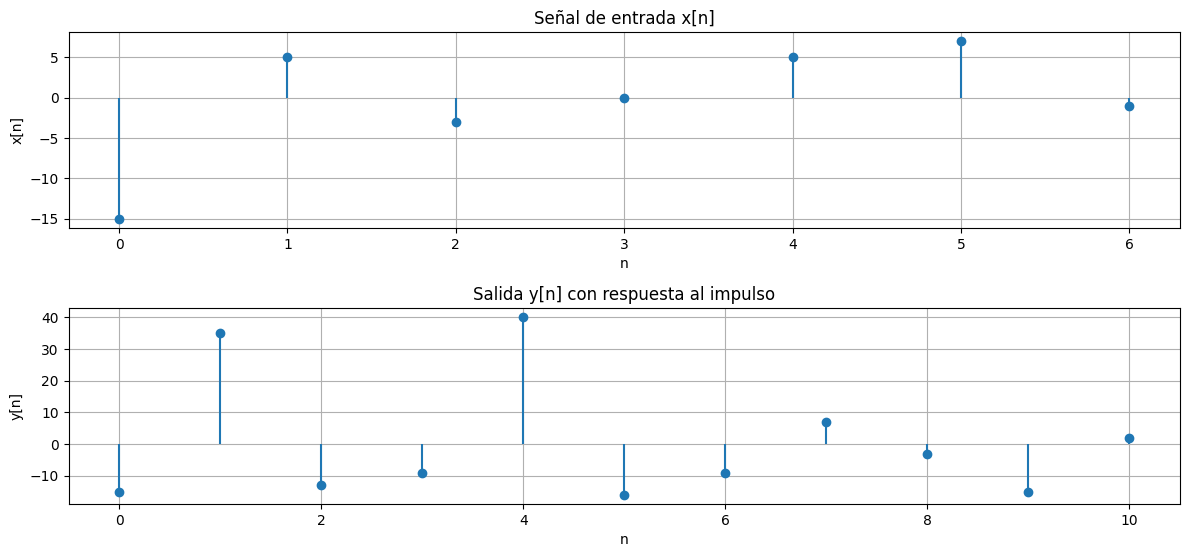

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Señal de entrada
x = np.array([-15, 5, -3, 0, 5, 7, -1])

# Respuesta al impulso
h_impulso = np.array([1, -2, 0, 1, -2])

# Respuesta al escalón
h_escalon = np.array([-1, 6, -10, 3, 1, -10, 2, 5])

# Convolución para respuesta al impulso
y_impulso = np.convolve(x, h_impulso)

# Convolución para respuesta al escalón
y_escalon = np.convolve(x, h_escalon)

# Ejes de tiempo para graficar
n_x = np.arange(len(x))
n_h_impulso = np.arange(len(h_impulso))
n_h_escalon = np.arange(len(h_escalon))
n_y_impulso = np.arange(len(y_impulso))
n_y_escalon = np.arange(len(y_escalon))

# Graficar resultados
plt.figure(figsize=(12, 8))

# Entrada x[n]
plt.subplot(3, 1, 1)
plt.stem(n_x, x, basefmt=" ")
plt.title('Señal de entrada x[n]')
plt.xlabel('n')
plt.ylabel('x[n]')
plt.grid(True)

# Salida con respuesta al impulso
plt.subplot(3, 1, 2)
plt.stem(n_y_impulso, y_impulso, basefmt=" ")
plt.title('Salida y[n] con respuesta al impulso')
plt.xlabel('n')
plt.ylabel('y[n]')
plt.grid(True)

plt.tight_layout()
plt.show()

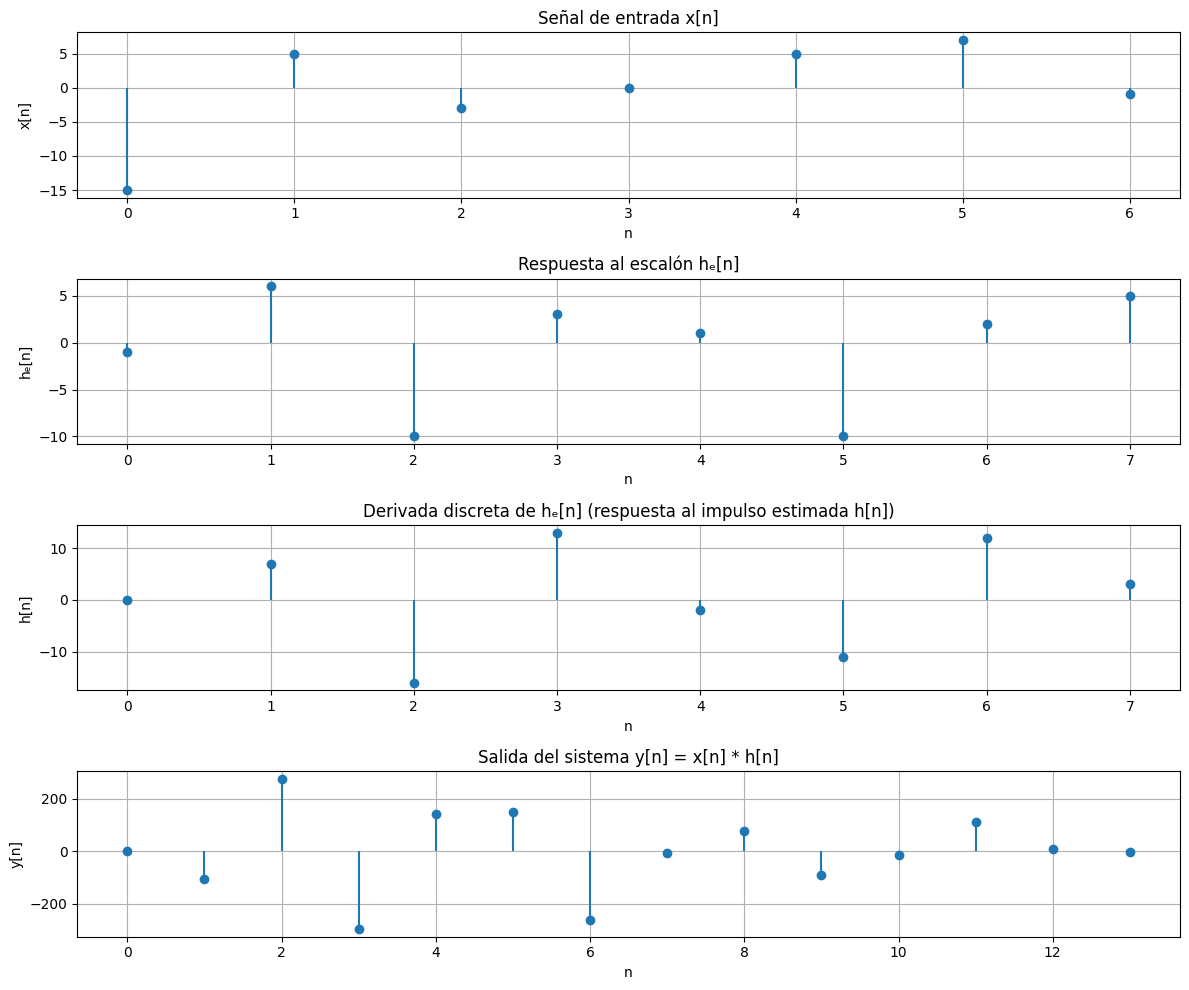

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Señal de entrada
x = np.array([-15, 5, -3, 0, 5, 7, -1])

# Respuesta al escalón
h_e = np.array([-1, 6, -10, 3, 1, -10, 2, 5])

# Calcular la derivada discreta (diferencia hacia adelante)
h = np.diff(h_e, prepend=h_e[0])  # h[n] = h_e[n] - h_e[n-1], con h[0] = h_e[0]

# Convolución entre la entrada y la derivada de la respuesta al escalón
y = np.convolve(x, h)

# Ejes de tiempo
n_x = np.arange(len(x))
n_he = np.arange(len(h_e))
n_h = np.arange(len(h))
n_y = np.arange(len(y))

# Graficar resultados
plt.figure(figsize=(12, 10))

# Entrada x[n]
plt.subplot(4, 1, 1)
plt.stem(n_x, x, basefmt=" ")
plt.title('Señal de entrada x[n]')
plt.xlabel('n')
plt.ylabel('x[n]')
plt.grid(True)

# Respuesta al escalón h_e[n]
plt.subplot(4, 1, 2)
plt.stem(n_he, h_e, basefmt=" ")
plt.title('Respuesta al escalón hₑ[n]')
plt.xlabel('n')
plt.ylabel('hₑ[n]')
plt.grid(True)

# Derivada discreta h[n]
plt.subplot(4, 1, 3)
plt.stem(n_h, h, basefmt=" ")
plt.title('Derivada discreta de hₑ[n] (respuesta al impulso estimada h[n])')
plt.xlabel('n')
plt.ylabel('h[n]')
plt.grid(True)

# Salida y[n]
plt.subplot(4, 1, 4)
plt.stem(n_y, y, basefmt=" ")
plt.title('Salida del sistema y[n] = x[n] * h[n]')
plt.xlabel('n')
plt.ylabel('y[n]')
plt.grid(True)

plt.tight_layout()
plt.show()

#PUNTO 3
Sea la señal Gaussiana $x(t) = e^{-at^2}$ con $a \in \mathbb{R}^+$,  
el sistema $A$ con relación entrada-salida $y_A(t) = x^2(t)$,  
y el sistema lineal e invariante con el tiempo $B$ con respuesta al impulso  
$h_B(t) = Be^{-bt^2}$:

**a)** Encuentre la salida del sistema en serie:  
$x(t) \rightarrow h_B(t) \rightarrow y_A(t) \rightarrow y(t)$

**b)** Encuentre la salida del sistema en serie:  
$x(t) \rightarrow y_A(t) \rightarrow h_B(t) \rightarrow y(t)$

**a**)  Salida del sistema en serie:  
 $x(t) \rightarrow h_B(t) \rightarrow y_A(t) \rightarrow y(t)$

Definiciones iniciales

Sea la señal de entrada:

$x(t) = e^{-at^2}, \quad a > 0$

El sistema $B$ es un sistema lineal e invariante en el tiempo (LTI) con respuesta al impulso:

$h_B(t) = B e^{-bt^2}, \quad b > 0$

La salida del sistema LTI $B$ es la convolución:

$y_B(t) = x(t) * h_B(t) = \int_{-\infty}^{\infty} x(\tau) h_B(t - \tau) d\tau$

Luego, el sistema $A$ aplica al resultado de la convolución una operación no lineal:

$y(t) = y_A(t) = (y_B(t))^2$
  


Desarrollo simbólico de la convolución

Usamos que:

$x(t) = e^{-at^2}, \quad h_B(t) = B e^{-bt^2}$

Entonces:

$y_B(t) = x(t) * h_B(t) = B \int_{-\infty}^{\infty} e^{-a\tau^2} e^{-b(t - \tau)^2} d\tau$

$= B \int_{-\infty}^{\infty} e^{-a\tau^2 - b(t - \tau)^2} d\tau$

Desarrollamos el exponente:

$b(t - \tau)^2 = b(t^2 - 2t\tau + \tau^2) = bt^2 - 2bt\tau + b\tau^2$

$\Rightarrow a\tau^2 + b(t - \tau)^2 = (a + b)\tau^2 - 2bt\tau + bt^2$

$\Rightarrow y_B(t) = B e^{-bt^2} \int_{-\infty}^{\infty} e^{-(a + b)\tau^2 + 2bt\tau} d\tau$

La integral tiene forma Gaussiana, y su resultado es:

$\int_{-\infty}^{\infty} e^{-(a + b)(\tau - \frac{bt}{a + b})^2} d\tau = \sqrt{\frac{\pi}{a + b}}$

$\Rightarrow y_B(t) = B e^{-bt^2} \cdot e^{\frac{b^2t^2}{a + b}} \cdot \sqrt{\frac{\pi}{a + b}}$

$= B \sqrt{\frac{\pi}{a + b}} \cdot e^{-bt^2 + \frac{b^2t^2}{a + b}} = B \sqrt{\frac{\pi}{a + b}} \cdot e^{-\frac{abt^2}{a + b}}$



Finalmente, el sistema $A$ eleva la salida al cuadrado:

$y(t) = \left[ B \sqrt{\frac{\pi}{a + b}} \cdot e^{-\frac{abt^2}{a + b}} \right]^2
= B^2 \cdot \frac{\pi}{a + b} \cdot e^{-2\frac{abt^2}{a + b}}$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
a = 1
b = 2
B = 1

# Tiempo
t = np.linspace(-5, 5, 1000)

# Señales individuales
x_t = np.exp(-a * t**2)
h_B_t = B * np.exp(-b * t**2)

# Convolución (analítica) entre x(t) y h_B(t)
# Resultado intermedio: y_B(t)
factor = B * np.sqrt(np.pi / (a + b))
exp_argument = -a * b * t**2 / (a + b)
y_B_t = factor * np.exp(exp_argument)

# Resultado final: y(t) = (y_B(t))^2
y_t = y_B_t**2

# Gráficas
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(t, x_t, label="x(t) = $e^{-at^2}$")
plt.title("Señal de entrada x(t)")
plt.grid(True)
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(t, y_B_t, label="y_B(t) = x(t) * h_B(t)", color='orange')
plt.title("Salida del sistema LTI B: y_B(t)")
plt.grid(True)
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(t, y_t, label="y(t) = [y_B(t)]²", color='green')
plt.title("Salida final y(t) del sistema en serie")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

 **b**) Salida del sistema en serie:  
 $x(t) \rightarrow y_A(t) \rightarrow h_B(t) \rightarrow y(t)$

 Definiciones iniciales

Se tiene la señal de entrada:

$x(t) = e^{-at^2}, \quad a > 0$

El sistema $A$ aplica primero una transformación no lineal a la entrada:

$y_A(t) = x^2(t) = \left(e^{-at^2}\right)^2 = e^{-2at^2}$

Luego, la señal $y_A(t)$ pasa por el sistema lineal e invariante $B$ con respuesta al impulso:

$h_B(t) = B e^{-bt^2}$

La salida total del sistema es entonces la convolución entre $y_A(t)$ y $h_B(t)$:

$y(t) = y_A(t) * h_B(t) = \int_{-\infty}^{\infty} y_A(\tau) h_B(t - \tau) d\tau$
  
Desarrollo simbólico de la convolución

Se tiene:

$y_A(t) = e^{-2at^2}, \quad h_B(t) = B e^{-bt^2}$

Entonces:

$y(t) = B \int_{-\infty}^{\infty} e^{-2a\tau^2} e^{-b(t - \tau)^2} d\tau$

$= B \int_{-\infty}^{\infty} e^{-2a\tau^2 - b(t - \tau)^2} d\tau$

Expandimos el exponente de la segunda parte:

$b(t - \tau)^2 = bt^2 - 2bt\tau + b\tau^2$

Por lo tanto:

$-2a\tau^2 - b(t - \tau)^2 = -(2a + b)\tau^2 + 2bt\tau - bt^2$

Sustituyendo en la integral:

$y(t) = B e^{-bt^2} \int_{-\infty}^{\infty} e^{-(2a + b)\tau^2 + 2bt\tau} d\tau$

Reconocemos nuevamente una integral Gaussiana con desplazamiento:

$\int_{-\infty}^{\infty} e^{-(2a + b)(\tau - \frac{bt}{2a + b})^2} d\tau = \sqrt{\frac{\pi}{2a + b}}$

Por lo tanto:

$y(t) = B e^{-bt^2} \cdot e^{\frac{b^2t^2}{2a + b}} \cdot \sqrt{\frac{\pi}{2a + b}}$

$= B \sqrt{\frac{\pi}{2a + b}} \cdot e^{-bt^2 + \frac{b^2t^2}{2a + b}} = B \sqrt{\frac{\pi}{2a + b}} \cdot e^{-\frac{2ab t^2}{2a + b}}$

Resultado :

$y(t) = B \sqrt{\frac{\pi}{2a + b}} \cdot e^{-\frac{2ab t^2}{2a + b}}$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
a = 1
b = 2
B = 1

# Tiempo
t = np.linspace(-5, 5, 1000)

# Señal después de sistema no lineal A: y_A(t) = e^{-2a t^2}
y_A_t = np.exp(-2 * a * t**2)

# Respuesta impulsiva del sistema LTI B
h_B_t = B * np.exp(-b * t**2)

# Resultado de la convolución analítica: y(t)
factor = B * np.sqrt(np.pi / (2 * a + b))
exponent = - (2 * a * b * t**2) / (2 * a + b)
y_t = factor * np.exp(exponent)

# Gráficas
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(t, y_A_t, label="y_A(t) = $e^{-2at^2}$")
plt.title("Salida del sistema no lineal A: y_A(t)")
plt.grid(True)
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(t, h_B_t, label="h_B(t) = $Be^{-bt^2}$", color='orange')
plt.title("Respuesta al impulso del sistema B: h_B(t)")
plt.grid(True)
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(t, y_t, label="y(t) = y_A(t) * h_B(t)", color='green')
plt.title("Salida final y(t) del sistema en serie")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

#PUNTO 4
i) $\mathcal{L}\{x(t - t_0)\} = e^{-s t_0} X(s)$

ii) $\mathcal{L}\{x(at)\} = \dfrac{1}{|a|} X\left(\dfrac{s}{a}\right)$

iii) $\mathcal{L}\left\{\dfrac{d x(t)}{dt}\right\} = s \cdot X(s)$

iv) $\mathcal{L}\{x(t) * y(t)\} = X(s) \cdot Y(s)$